# Week 3 - Day 3  - Afternoon - more data structures

In [ ]:
%run "boaz_utils.ipynb"

## Review: Algorithm to Code

In [86]:
def addnums(L1,L2):
    n = max(len(L1),len(L2))
    L1 = [0]*(n-len(L1))+L1
    L2 = [0]*(n-len(L2))+L2
    result = [0]*(n+1)
    carry = 0
    for i in range(n-1,-1,-1):
        temp = L1[i] + L2[i] + carry
        if temp>10:
            carry = 1
            result[i+1] = temp-10
        else:
            carry = 0
            result[i+1] = temp
    result[0] = carry
    return result

Write function `addnums(L1,L2)` that takes two lists of digits representing two numbers $x,y$  and returns list of digits representing $x+y$.<br>
<small>(Can assume `len(L1)=len(L2)`, result can have leading zeroes)</small>

In [89]:
addnums([1,2,3],[0,9,8])

[0, 2, 2, 1]

In [98]:
def addnums(L1,L2):
    n = len(L1)
    result = [0]*(n+1)
    for i in range(n)[::-1]:
        if L1[i]+L2[i]+result[i+1]<10:
            result[i+1] += L1[i]+L2[i]
        else:
            result[i+1] += L1[i]+L2[i]-10
            result[i] += 1
        print("i=",i,"result=",result)
    return result
addnums([9,9,9,9],[0,0,0,2])

i= 3 result= [0, 0, 0, 1, 1]
i= 2 result= [0, 0, 1, 0, 1]
i= 1 result= [0, 1, 0, 0, 1]
i= 0 result= [1, 0, 0, 0, 1]


[1, 0, 0, 0, 1]

In [ ]:
def intersection(L1,L2):
    result = []
    D = {}
    for a in L1:
        D[a] = "Doesn't matter"
    for b in L2:
        if b in D: result.append(b)
    return result

__Question:__ Use dictionaries to write function `intersect(L1,L2)` that takes two lists of strings and returns their intersection in time $O(n)$

__Input:__ $L1$, $L2$. <br>
1) Set up empty dictionary $D$ and empty list $result$ <br>
2) For every $s$ in $L1$ set $D[s] = 1$ (cost $O(n)$) <br>
3) For every $s$ in $L2$ check if $s$ is a key in $D$. If so append $s$ to $result$. <br>
4) Return $result$

# Back to data structures

## Reminder: data structures

|Data structure|Get(key).... |Set(key).... |Other properties              |
|--------------|-------------|-------------|------------------------------|
|Unsorted array|$O(n)$          |$O(1)$     | Supports any objects         |
|Sorted array  |$O(\log n)$     |$O(n)$          | Supports range queries       |
|Search trees  |$O(\log n)$     |$O(\log n)$     | Support range queries        |
|Hash table    |$O(1)$        |$O(1)$        | Supports non-comparable keys |


## Queue

Suppose you are writing a __text messaging__ application. Every time a message is received you need to store it in a data structure, and then when a user opens the application, show them all unread messages in order they were recieved.

Data structure is __Queue__ with operations:

* `Add(Q,item)`: Add  `item` to queue `Q`.
* `Get(Q)`: Get the item in the queue that was added first, and remove it.

__FIFO__: _first in first out_

## First attempt

In [ ]:
def new_queue(n): # n: max no of items
    return [None]*n

def add_queue(Q,item):
    i = 0
    while Q[i]: i+= 1
    Q[i] = item
    
def get_queue(Q):
    item = Q[0]
    for i in range(0,len(Q)-1):
        Q[i]=Q[i+1]
    return item    

In [99]:
Q = new_queue(10)
add_queue(Q,"first")
add_queue(Q,"second")
add_queue(Q,"third")
print(get_queue(Q))
print(get_queue(Q))
print(get_queue(Q))
print(get_queue(Q))

first
second
third
None


What is the time complexity of this implementation?

In exercises: implementation with $O(1)$

## Stack

Suppose you want to show the _last message first_: __LIFO__ _Last In First Out_. This is known as __Stack__ data structure with operations:

* `Add(S,item)`: Add `item` to the Stack `S`
* `Pop(S)`: Get the item in the stack `S` that  was added _last_, and remove it.

In [12]:
def new_stack(n): # n: max no of items
    return [0]+[None]*n

def add_stack(S,item):
    S[0] +=1 
    S[S[0]] = item
    
def pop_stack(S):
    item = S[S[0]]
    S[S[0]] = None
    S[0] -= 1
    return item
def p(S):
    print(S[1:S[0]+1])

In [15]:
S = new_stack(10)
p(S)
add_stack(S,"first")
p(S)
add_stack(S,"second")
p(S)
add_stack(S,"third")
p(S)
pop_stack(S)
p(S)


[]
['first']
['first', 'second']
['first', 'second', 'third']
['first', 'second']


# Hash tables implementation*

__Reminder:__ _Dictionaries_ can do __get__ and __set__ ops  with any key in $O(1)$.

__Arrays__  can do __get__ and __set__ with keys in $\{0,1,2,\ldots, n-1 \}$. <br>
__Idea:__ Translate any key $k$ into a number $h(k)$ in $\{0,1,2,\ldots,n-1\}$.

In [ ]:
def h(s,n): return hash(s) % n

In [103]:
h("Jelani Nelson",100)

57

In [ ]:
teams = {"Alexis Sanchez" : "Arsenal","Mesut Ozil" : "Arsenal","Petr Cech" : "Arsenal","Theo Walcott" : "Arsenal","Laurent Koscielny" : "Arsenal","Hector Bellerin" : "Arsenal","Olivier Giroud" : "Arsenal","Nacho Monreal" : "Arsenal","Shkodran Mustafi" : "Arsenal","Alex Iwobi" : "Arsenal","Granit Xhaka" : "Arsenal","Alex Oxlade-Chamberlain" : "Arsenal","Jack Wilshere" : "Arsenal","Aaron Ramsey" : "Arsenal","Francis Coquelin" : "Arsenal","Gabriel Paulista" : "Arsenal","Kieran Gibbs" : "Arsenal","Santi Cazorla" : "Arsenal","Danny Welbeck" : "Arsenal","Rob Holding" : "Arsenal","Mohamed Elneny" : "Arsenal","Lucas Perez" : "Arsenal","Emiliano Martinez" : "Arsenal","David Ospina" : "Arsenal","Carl Jenkinson" : "Arsenal","Per Mertesacker" : "Arsenal","Sead Kolasinac" : "Arsenal","Alexandre Lacazette" : "Arsenal","Eden Hazard" : "Chelsea","Diego Costa" : "Chelsea","Gary Cahill" : "Chelsea","Marcos Alonso Mendoza" : "Chelsea","Cesar Azpilicueta" : "Chelsea","Pedro" : "Chelsea","Thibaut Courtois" : "Chelsea","David Luiz" : "Chelsea","Cesc Fabregas" : "Chelsea","Willian" : "Chelsea","Victor Moses" : "Chelsea","Nemanja Matic" : "Chelsea","N%27Golo Kante" : "Chelsea","Willy Caballero" : "Chelsea","Michy Batshuayi" : "Chelsea","Kurt Zouma" : "Chelsea","Kenedy" : "Chelsea","Eduardo Carvalho" : "Chelsea","Antonio Rudiger" : "Chelsea","Tiemoue Bakayoko" : "Chelsea","Roberto Firmino" : "Liverpool","Philippe Coutinho" : "Liverpool","Sadio Mane" : "Liverpool","Georginio Wijnaldum" : "Liverpool","James Milner" : "Liverpool","Adam Lallana" : "Liverpool","Nathaniel Clyne" : "Liverpool","Simon Mignolet" : "Liverpool","Dejan Lovren" : "Liverpool","Emre Can" : "Liverpool","Joel Matip" : "Liverpool","Divock Origi" : "Liverpool","Jordan Henderson" : "Liverpool","Daniel Sturridge" : "Liverpool","Lucas Leiva" : "Liverpool","Ragnar Klavan" : "Liverpool","Mamadou Sakho" : "Liverpool","Loris Karius" : "Liverpool","Trent Alexander-Arnold" : "Liverpool","Alberto Moreno" : "Liverpool","Ben Woodburn" : "Liverpool","Marko Grujic" : "Liverpool","Joe Gomez" : "Liverpool","Sheyi Ojo" : "Liverpool","Mohamed Salah" : "Liverpool","Danny Ings" : "Liverpool","Dominic Solanke" : "Liverpool","Romelu Lukaku" : "Manchester United","David de Gea" : "Manchester United","Antonio Valencia" : "Manchester United","Paul Pogba" : "Manchester United","Eric Bailly" : "Manchester United","Juan Mata" : "Manchester United","Daley Blind" : "Manchester United","Ander Herrera" : "Manchester United","Anthony Martial" : "Manchester United","Marcos Rojo" : "Manchester United","Marcus Rashford" : "Manchester United","Henrikh Mkhitaryan" : "Manchester United","Matteo Darmian" : "Manchester United","Jesse Lingard" : "Manchester United","Phil Jones" : "Manchester United","Chris Smalling" : "Manchester United","Marouane Fellaini" : "Manchester United","Luke Shaw" : "Manchester United","Michael Carrick" : "Manchester United","Ashley Young" : "Manchester United","Sergio Romero" : "Manchester United","Axel Tuanzebe" : "Manchester United","Timothy Fosu-Mensah" : "Manchester United","Joel Castro Pereira" : "Manchester United","Victor Lindelof" : "Manchester United"}
players = list(teams.keys())
team_list = [ k+":"+teams[k] for k in teams];

__Dream version:__ To store the teams for a set $P$ of $n$ players, find a function `h` we can quickly compute such that: <br>
1) `h` takes a string `name` and a number `n` and outputs a number from `0` to `n-1`. <br>
2) If `player1` and `player2` are two _different_ names of players in $P$ then `h(player1,n)` $\neq$ `h(player2,n)`

To store teams we fix an array (Python list) `A` of `n` elements, and then we put, `A[h(player,n)]=team` 

We just need to compute `h` (which we consider $O(1)$) to store or retrieve team information.

__Problem:__ How do we find such a function?

__Insight 1:__ It's OK to have following weaker condition: for every `i` between `0` and `n-1`, the number of players `player` such that `h(player,n)=i` is at most $c$. 

We can put in position `i` the _list_ of all players `p` with `h(p,n)=i`. To add/update/remove player we just scan this list which takes  $O(c)$ steps.

__Insight 2:__ A _random_ function will have (essentially) this property.

__Insight 3:__ We can find "randomish" functions that will have a similar property.

__Example:__ One simple function is the following: treat each letter as a number from $1$ to $26$ and add all the letters in the name modulo $n$ 

In [ ]:
def letter_to_number(c):
    if c==' ':
        return 27
    if c=='-':
        return 28
    return 1+ord(c)-ord('a')

In [107]:
letter_to_number('e')

5

In [108]:
def h(s,n):
    res = 0
    for c in s.lower():
        res += letter_to_number(c)
    return res % n

In [112]:
h("Tsige Maria",100)

29

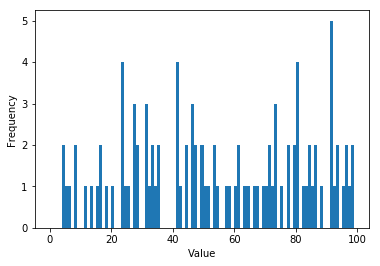

In [113]:
integer_hist([h(p,100) for p in players])

This function is "pretty spread out": most places only have one player matched to it, but several places have two players and a few have more. The maximum number of players in one slot is $5$.

# Code

In [ ]:
def hash_new(n):
    return [[] for i in range(n)]

def hash_add(Table,key,value):
    Table[h(key,len(Table))].append((key,value))
    
def hash_get(Table,key):
    L = Table[h(key,len(Table))]
    for (k,v) in L: 
        if k==key: return v
    return None

In [ ]:
print(team_list[1],team_list[4],team_list[78],team_list[45])

In [117]:
T = hash_new(10)
hash_add(T,"Mesut Ozil","Arsenal")
hash_add(T,"Laurent Koscielny","Arsenal")
hash_add(T,"Eduardo Carvalho","Chelsea")
hash_add(T,"Paul Pogba","Manchester United")
print(get(T,"Boaz Barak"))

None


In [ ]:
def genhashtable(n):
    T = hash_new(10*n)
    for i in range(n):
        hash_add(T,randomstring(),randomstring())
    return (T, randomstring())

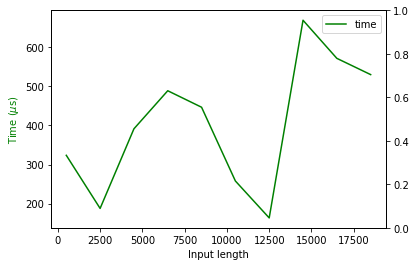

In [80]:
def t(T,s): return hash_get(T,s)
timer(t,[genhashtable(n) for n in range(50,2000,200)],inlen = lambda L: len(L[0]),interpolate = False, usesteps =False );

## Bonus: object oriented description

In [ ]:
class Hashtable:
    def __init__(self,n):
        self.table = [[] for i in range(n)]
        
    def add(self,key,value):
        self.table[h(key,len(self.table))].append((key,value))
        
    def get(self,key):
        L = self.table[h(key,len(self.table))]
        for (k,v) in L: 
            if k==key: return v
        return None

In [118]:
T = Hashtable(10)
T.add("Mesut Ozil","Arsenal")
T.add("Laurent Koscielny","Arsenal")
T.add("Eduardo Carvalho","Chelsea")
T.add("Paul Pogba","Manchester United")
T.get("Eduardo Carvalho")

'Chelsea'